In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context('talk', font_scale=1.2)
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

from scipy.stats import binom, beta
from scipy.special import beta as B

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


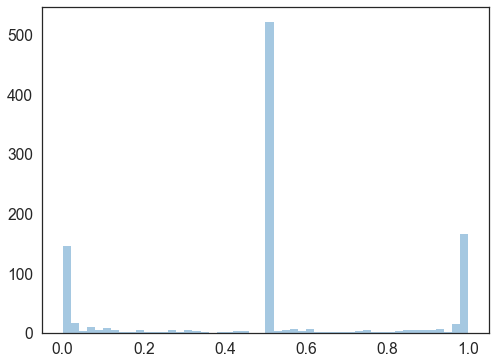

In [6]:
from env import CoinGame
def make_theta():
#     return 0.3 if np.random.rand() < 0.5 else 0.7
    biased = np.random.rand() < 0.5
    return beta(.1, .1).rvs() if biased else 0.5

sns.distplot([make_theta() for _ in range(1000)], kde=0)

In [7]:
env = CoinGame(memory_cost=1, error_cost=20, rounds=5, make_theta=make_theta)

def run_one(policy):
    reward = 0
    done = False 
    obs = env.reset()
    actions = []
    while not done:
        action = policy(obs)
        obs, r, done, info = env.step(action)
        actions.append(action)
        reward += r
    return {'theta': env.theta, 'truth': info['truth'],
            'policy': policy.__name__, 'obs_rate': np.mean(actions),
            'guess': info['guess'], 'reward': reward}

In [13]:
from toolz import curry, memoize

@memoize
def llr(obs):
    loglike = env.log_likelihood(obs)
    h0_likelihood = np.exp(loglike[env.grid_size // 2 - 1])
    h1_likelihood = (env.h1_prior * np.exp(loglike)).sum()
    return np.log(h1_likelihood / h0_likelihood)

@curry
def llr_policy(obs, thresh=0):
    return int(abs(llr(obs)) > thresh)

thresholds = set(round(abs(llr(x)), 4) + .01 for x in range(7))
thresholds.add(0)
thresholds

{0, 0.0333, 1.3476, 1.7371, 3.0267}

In [18]:
llr(5)

-0.023281200749102508

In [56]:
def test_llr():
    for thresh in thresholds:
        pol = llr_policy(thresh=thresh)
        for _ in range(500):
            yield {'threshold': f'{thresh:.2f}', **run_one(pol)}
        
df = pd.DataFrame(test_llr())      

9.313225746154793e-10 0.2005853717228136
0.003017485141754152 0.0010764573836123282
0.054931640625000014 0.006826913934273803
0.0012572854757308973 0.0001824905002079427
9.313225746154793e-10 0.2005853717228136
0.00011175870895385777 1.1478284873378074e-05
0.0009429641067981732 9.684802861912745e-05
0.004023313522338869 0.0003831034005983743
2.7939677238464424e-07 4.007839998115543e-05
0.0016763806343078644 0.0001721742731006711
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.2005853717228136
0.00011175870895385777 2.6451075505615725e-05
0.0009429641067981732 0.0002231809495786325
1.3969838619232196e-08 0.001332854704973024
9.313225746154793e-10 0.20058537172281377
6.286427378654491e-05 6.21487675281854e-05
0.003017485141754152 0.00037267236741376505
1.3969838619232196e-08 0.001332854704973024
0.030517578125000062 0.0030843890045350085
0.004882812500000005 0.0032841983734300086
0.003017485141754152 0.000372672367413765
0.005364

0.003017485141754152 0.000372672367413765
0.005364418029785162 0.0006625286531800272
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
0.005364418029785162 0.0006625286531800271
0.017166137695312507 0.0017349688150509412
0.000858306884765626 0.0019123917118227596
0.054931640625000014 0.006826913934273803
0.004023313522338869 0.00038310340059837433
0.0016763806343078644 0.00013081448720507163
8.940696716308611e-07 0.0021837473312033666
9.313225746154793e-10 0.20058537172281377
0.054931640625000014 0.014140298541137046
0.07324218750000004 0.0108873660128288
0.054931640625000014 0.006826913934273803
0.0012572854757308973 0.00010506908280832878
9.313225746154793e-10 0.2005853717228136
0.012874603271484384 0.003784125041868238
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
0.017166137695312507 0.002772752282930482
0.0016763806343078644 0.00013081448720507163
0.003017485141754152 0.00026358147189929463
9.313225746154793e-10

9.313225746154793e-10 0.20058537172281377
0.0016763806343078644 0.00017217427310067113
0.005364418029785162 0.0006625286531800271
0.004023313522338872 0.0003831034005983743
5.960464477539072e-08 0.21556719724581355
5.960464477539072e-08 0.21556719724581355
0.017166137695312507 0.0017349688150509412
9.313225746154793e-10 0.20058537172281377
0.0009429641067981723 0.00022318094957863254
0.017166137695312507 0.0017349688150509412
5.960464477539072e-08 0.21556719724581366
0.002235174179077154 0.00018678948054814016
9.313225746154793e-10 0.2005853717228136
0.0007072230800986293 5.9101359079684907e-05
9.313225746154793e-10 0.2005853717228136
5.7220458984375034e-05 0.004169610375256365
0.004023313522338869 0.0007699165392723939
0.007152557373046889 0.0006810727121748881
9.313225746154793e-10 0.2005853717228136
0.0016763806343078644 0.00017217427310067113
9.313225746154793e-10 0.20058537172281377
0.0016763806343078644 0.0001721742731006711
5.960464477539072e-08 0.21556719724581366
0.00402331352

9.313225746154793e-10 0.2005853717228136
0.3125000000000002 0.05556284976621723
9.313225746154793e-10 0.20058537172281377
1.0 1.0
1.0 1.0
0.09765625000000012 0.012136735883153433
9.313225746154793e-10 0.2005853717228136
0.015625000000000007 0.31911001436642117
9.313225746154793e-10 0.2005853717228136
0.030517578125000062 0.0030843890045350085
0.09765625000000012 0.012136735883153433
9.313225746154793e-10 0.20058537172281377
0.015625000000000007 0.31911001436642117
0.09765625000000012 0.012136735883153433
0.00024414062500000016 0.2648821233652184
5.960464477539072e-08 0.21556719724581355
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.20058537172281377
1.0 1.0
0.09765625000000012 0.012136735883153433
2.3841857910156297e-05 2.082619037228996e-06
0.004882812500000005 0.003284198373430008
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
0.09765625000000012 0.012136735883153433
9.313225746154793e-10 0.2005853717228136
5.960464477539072e-08

1.0 1.0
9.313225746154793e-10 0.2005853717228136
1.0 1.0
5.960464477539072e-08 0.21556719724581355
0.015625000000000007 0.31911001436642117
1.0 1.0
9.313225746154793e-10 0.20058537172281377
0.015625000000000007 0.31911001436642106
1.0 1.0
9.313225746154793e-10 0.2005853717228136
0.015625000000000007 0.31911001436642117
1.0 1.0
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
3.814697265625008e-06 0.23550523521639818
1.0 1.0
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.2005853717228136
3.814697265625008e-06 0.23550523521639796
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
0.015625000000000007 0.31911001436642106
1.0 1.0
1.0 1.0
1.0 1.0
0.015625000000000007 0.31911001436642106
1.0 1.0
1.0 1.0
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.2005853717228136
0.015625000000000007 0.31911001436642106
0.00024414062500000016 0.2648821233652184
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
9.31

9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
3.814697265625008e-06 0.23550523521639796
3.814697265625008e-06 0.23550523521639818
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
5.960464477539072e-08 0.21556719724581355
1.0 1.0
1.0 1.0
1.0 1.0
5.960464477539072e-08 0.21556719724581366
1.0 1.0
0.015625000000000007 0.31911001436642117
9.313225746154793e-10 0.2005853717228136
0.015625000000000007 0.31911001436642117
0.015625000000000007 0.31911001436642106
1.0 1.0
1.0 1.0
0.00024414062500000016 0.2648821233652184
9.313225746154793e-10 0.2005853717228136
1.0 1.0
5.960464477539072e-08 0.21556719724581366
1.0 1.0
0.00024414062500000016 3.034183970788357e-05
1.0 1.0
9.313225746154793e-10 0.20058537172281377
1.0 1.0
9.313225746154793e-10 0.20058537172281377
1.0 1.0
1.0 1.0
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
1.0 1.0
9.313225746154793e-1

0.00037718564271926923 3.1520724842498634e-05
6.0349702835083184e-05 2.7011524036130766e-05
1.6763806343078647e-06 5.088792694703946e-05
1.2572854757308977e-06 0.00018035279991519948
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
0.0002682209014892583 2.0930317952811474e-05
5.029141902923595e-07 0.00044164441755775334
0.0006705522537231464 5.603684416444206e-05
0.0012572854757308973 0.00018249050020794266
0.0016763806343078644 0.00013081448720507163
0.0012572854757308984 0.00010506908280832875
9.313225746154793e-10 0.2005853717228136
0.0012572854757308984 0.00018249050020794266
6.0349702835083184e-05 8.759544009981257e-06
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.20058537172281377
0.0002828892320394517 6.695428487358976e-05
0.00037718564271926923 3.1520724842498634e-05
0.00015087425708770782 3.5708951932581234e-05
4.526227712631235e-05 1.071268557977437e-05
2.5145709514617937e-05 2.1013816561665757e-06
0.0002828892320394517 2

0.0006705522537231464 5.603684416444206e-05
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
2.5145709514617937e-05 2.1013816561665757e-06
0.00037718564271926923 5.4747150062382804e-05
0.0005029141902923594 0.00011902983977527075
9.313225746154793e-10 0.2005853717228136
0.00011315569281578079 1.6424145018714845e-05
0.00011315569281578079 9.45621745274959e-06
0.00015087425708770782 1.1773303848456447e-05
0.0007072230800986293 5.910135907968489e-05
0.0006705522537231464 5.603684416444206e-05
0.00015087425708770782 3.5708951932581234e-05
1.8104910850524957e-05 1.5129947924399357e-06
0.0012572854757308973 0.0001824905002079427
9.313225746154793e-10 0.20058537172281377
9.313225746154793e-10 0.2005853717228136
0.0007072230800986293 0.0001026509063669677
9.313225746154793e-10 0.20058537172281377
0.0005029141902923594 5.165228193020134e-05
5.5879354476928736e-09 0.013498155999621132
2.011656761169436e-07 0.001487344451557614
9.313225746154793e-10 0.200585371722

9.313225746154793e-10 0.2005853717228136
3.3527612686157346e-08 0.0031988512919352606
4.526227712631235e-05 0.0003628243103107125
5.5879354476928736e-09 0.013498155999621137
9.313225746154793e-10 0.20058537172281377
8.381903171539327e-05 3.7516005605737145e-05
9.313225746154793e-10 0.20058537172281377
7.543712854385382e-06 1.0949430012476563e-06
0.0012572854757308973 0.00010506908280832878
0.0006705522537231464 9.732826677756949e-05
0.0012572854757308973 0.00010506908280832878
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
9.313225746154793e-10 0.2005853717228136
0.002235174179077154 0.00018678948054814016


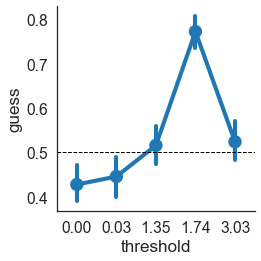

In [67]:
sns.factorplot('threshold', 'guess', data=df)
plt.axhline(0.5, c='k', ls='--', lw=1)

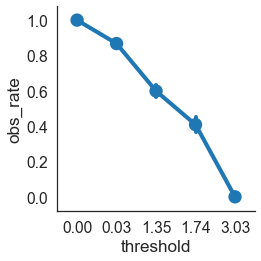

In [69]:
sns.factorplot('threshold', 'obs_rate', data=df)

In [ ]:
@curry
def rand_pol(obs, p=0.5):
    return np.random.rand() < p

rand = pd.DataFrame(
    {'p': f'{p:.2f}', ** run_one(rand_pol(p=p))}
    for p in np.linspace(0,1, 11)
    for _ in range(100)
)

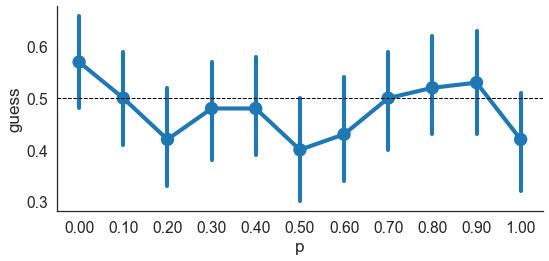

In [66]:
sns.factorplot('p', 'guess', data=rand, aspect=2)
plt.axhline(0.5, c='k', ls='--', lw=1)

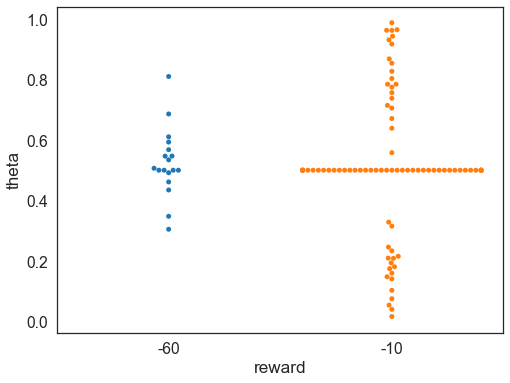

In [9]:
df = pd.DataFrame(run_one(always_observe) for _ in range(100))
df['correct'] = df.guess == df.truth
sns.swarmplot('reward', 'theta', data=df)